In [1]:
using Unitful
using DimensionfulAngles
using DimensionfulAngles.DefaultSymbols
using Plots

push!(LOAD_PATH, "../src")
using WaveSpectra

In [2]:
Nf = 200
Δf = 0.1Hz
f = (0:Nf-1) * Δf

Nθ = 36
Δθ = 360° / Nθ
θ = (0:Nθ-1) * Δθ

S = Spectrum(randn(Nf, Nθ) * m^2 / Hz / °, f, θ)

200×36 Spectrum{m² °⁻¹ Hz⁻¹}{Hz}{°}
Spectral density for Quantity (m²) with polar coordinates:
  • Axis 1: Frequency (Hz)
  • Axis 2: Direction (°)
and data(m² °⁻¹ Hz⁻¹):
 -0.8091056892584672     1.2958236978063336   …  -0.10344188406209821
 -0.11708530709121602    0.12358854871786921     -0.42687527021741306
  0.7074107682975237    -1.36619358818203        -0.5763212978813198
 -0.3785069764219807    -1.471487156024794       -1.4460543992783668
  1.4900760140748424     0.4061364594388913      -0.4617764310505369
  1.071838106374029     -0.2896104550180589   …   1.5620420488175646
 -2.6080906935467385    -0.2050195977321674      -0.6528391513219224
 -0.033866927943205075  -0.22000178076582172      1.3370448211155779
  0.8401388885055265     0.43675334370803154     -0.08256882526920219
  1.3699108572082446     0.34765387187780367     -0.4263568987974472
  ⋮                                           ⋱   ⋮
  0.4224016043696588    -0.8613743861422312       0.008755283779767394
 -0.44153993281533305   -0.38399923560979216      0.6222134099253265
 -0.5879054699273423     0.03553972825450895     -0.28156415753534175
  0.1493750919594443     1.1970185678651302       0.5657660672735306
 -1.0301658887349434     1.0087165079928433   …   0.0345181189291121
  0.9930979116567301    -0.1842771227164891       1.1473989742791892
  0.5648198196394997    -0.3431055880322681       0.28599529433333853
  0.6937416300913648     0.5790865245945412      -0.6786627297360296
 -0.619052362535157     -0.7918352205941929       0.015631274173859868

## Plots

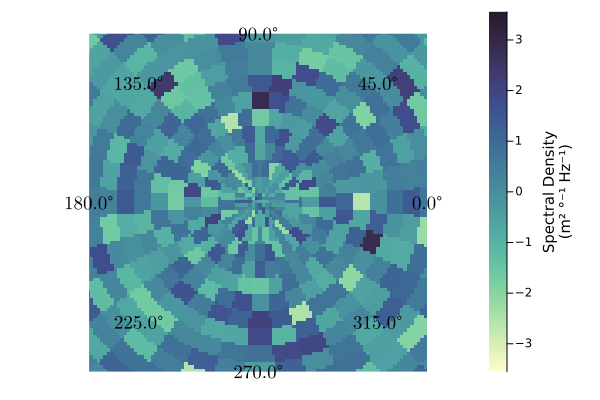

In [ ]:
plot(S))

In [4]:
Sr = uconvert(rad, :direction, S)

200×36 Spectrum{m² Hz⁻¹ rad⁻¹}{Hz}{rad}
Spectral density for Quantity (m²) with polar coordinates:
  • Axis 1: Frequency (Hz)
  • Axis 2: Direction (rad)
and data(m² Hz⁻¹ rad⁻¹):
  -46.358341174533635    74.2452288773387    …   -5.926783381639804
   -6.7084939393198475    7.081102237680867     -24.458151361964337
   40.53165140555508    -78.27712660066437      -33.02077801210154
  -21.686852265237256   -84.31000364792916      -82.85281402497601
   85.37506676016471     23.269905032234618     -26.457840577809623
   61.41179981652604    -16.59345677539815   …   89.49841681921455
 -149.4325893275759     -11.746757667523097     -37.40492807164865
   -1.9404320362193246  -12.605173523243996      76.60702526974674
   48.1364125161787      25.024123282696834      -4.730845207278429
   78.49011042718118     19.91909958998001      -24.42845086738009
    ⋮                                        ⋱    ⋮
   24.201829189936202   -49.35311690662191        0.5016408090200186
  -25.298374636808504   -22.001535536690803      35.650202345164615
  -33.68450217949205      2.036276434025207     -16.13243788893172
    8.558562333654717    68.58411193746606       32.41600784648791
  -59.02415762285582     57.79519863316429   …    1.9777425313687602
   56.900318981186516   -10.558301392469174      65.74111864383724
   32.3617918506837     -19.65850212160329       16.386323325902048
   39.74846747676116     33.179213832165956     -38.88451012670213
  -35.46908767086706    -45.368816209857776       0.895606038574013

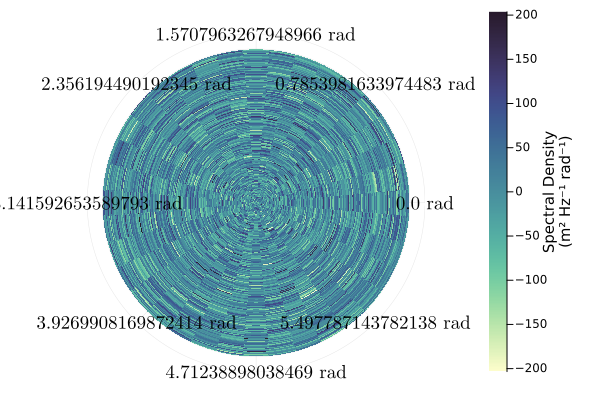

In [5]:
plot(Sr)

In [6]:
x = S
using DimensionfulAngles: turnᵃ as τ

n = 8
z_pos = maximum(ustrip.(x.axis1)) * exp.(im * 2π * (0:n-1) / n)
angle_unit = unit(x, :axis2)
angles = (1τ |> angle_unit) * ((0:n-1) / n)
angle_labels = map(angles) do angle
    label_str = repr(uconvert(angle_unit, angle), context=:fancy_exponent => true)
    return text(label_str, 12, "Computer Modern")
end
annotation = [(real(z_pos[i]), imag(z_pos[i]), angle_labels[i]) for i in 1:n]

8-element Vector{Tuple{Float64, Float64, Plots.PlotText}}:
 (19.9, 0.0, Plots.PlotText("0.0°", Plots.Font("Computer Modern", 12, :hcenter, :vcenter, 0.0, RGB{N0f8}(0.0, 0.0, 0.0))))
 (14.071424945612296, 14.071424945612293, Plots.PlotText("45.0°", Plots.Font("Computer Modern", 12, :hcenter, :vcenter, 0.0, RGB{N0f8}(0.0, 0.0, 0.0))))
 (1.2185235651516164e-15, 19.9, Plots.PlotText("90.0°", Plots.Font("Computer Modern", 12, :hcenter, :vcenter, 0.0, RGB{N0f8}(0.0, 0.0, 0.0))))
 (-14.071424945612293, 14.071424945612296, Plots.PlotText("135.0°", Plots.Font("Computer Modern", 12, :hcenter, :vcenter, 0.0, RGB{N0f8}(0.0, 0.0, 0.0))))
 (-19.9, 2.4370471303032328e-15, Plots.PlotText("180.0°", Plots.Font("Computer Modern", 12, :hcenter, :vcenter, 0.0, RGB{N0f8}(0.0, 0.0, 0.0))))
 (-14.071424945612298, -14.071424945612293, Plots.PlotText("225.0°", Plots.Font("Computer Modern", 12, :hcenter, :vcenter, 0.0, RGB{N0f8}(0.0, 0.0, 0.0))))
 (-3.655570695454849e-15, -19.9, Plots.PlotText("270.0°", Plots.Fo

In [7]:
annotation[1][1], annotation[1][2]

(19.9, 0.0)

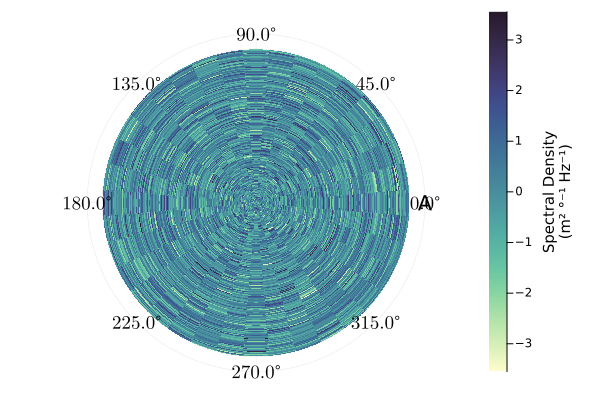

In [8]:
plot(S, xaxis=false)
# scatter!([0,], [22,])
annotate!(1,0,text("A"))

In [9]:
maximum(S.axis1)

19.9 Hz

In [14]:
divexact

UndefVarError: UndefVarError: `divexact` not defined